<a href="https://www.kaggle.com/luisramrez/traffic-and-drugs-exploratory-data-analysis?scriptVersionId=88377709" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic-violations-dataset/traffic_violaions.csv


In [2]:
df = pd.read_csv('/kaggle/input/traffic-violations-dataset/traffic_violaions.csv')

In [3]:
df.head(25)

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
5,3/23/2005,9:45,NaN,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
6,4/1/2005,17:30,NaN,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
7,6/6/2005,13:20,NaN,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
8,7/13/2005,10:15,NaN,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
9,7/13/2005,15:45,NaN,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


In [5]:
df.isnull().sum()

stop_date                 0
stop_time                 1
country_name          52966
driver_gender          3386
driver_age_raw         3378
driver_age             3620
driver_race            3385
violation_raw          3385
violation              3385
search_conducted          1
search_type           50881
stop_outcome           3385
is_arrested            3385
stop_duration          3385
drugs_related_stop        1
dtype: int64

In [6]:
df = df.drop(['country_name', 'search_type'], axis = 1)

In [7]:
df_drug_related = df[df['drugs_related_stop']==True]

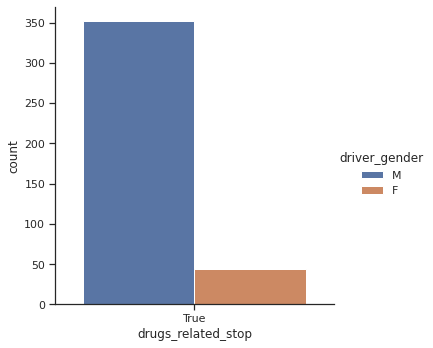

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="drugs_related_stop", kind="count", data=df_drug_related, hue='driver_gender')

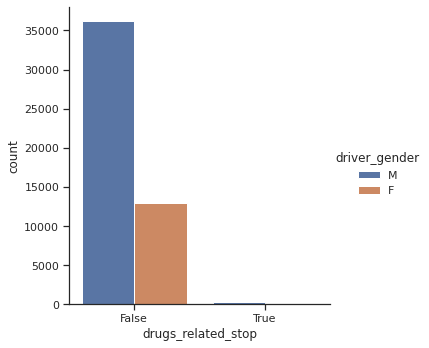

In [9]:
sns.catplot(x="drugs_related_stop", kind="count", data=df, hue='driver_gender')

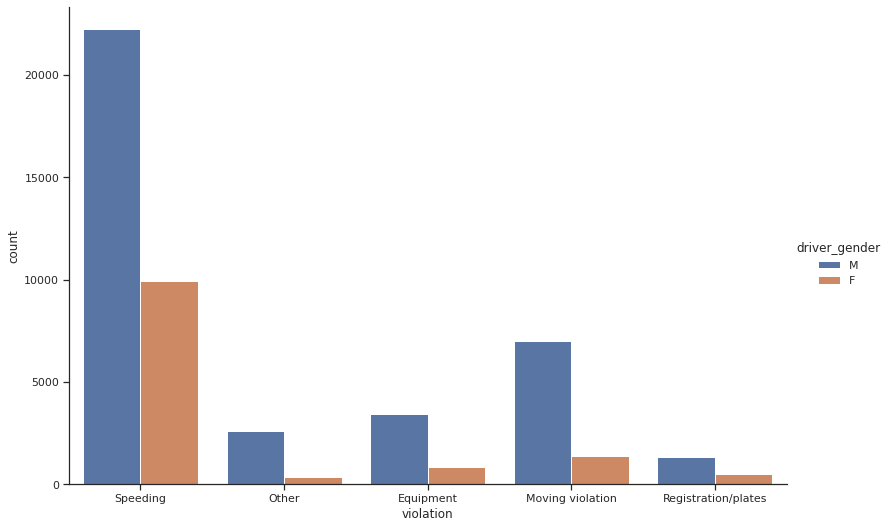

In [10]:
sns.catplot(x="violation", kind="count", data=df, hue='driver_gender', aspect = 1.5, height=7.5)

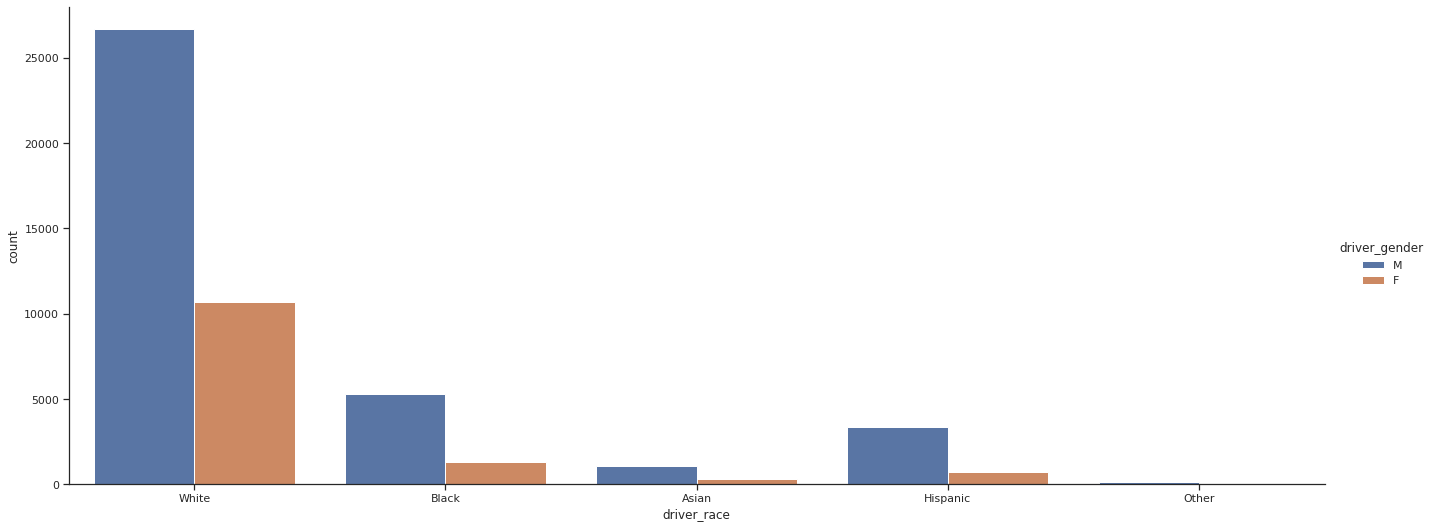

In [11]:
sns.catplot(x="driver_race", kind="count", data=df, hue='driver_gender', aspect = 2.5, height=7.5)

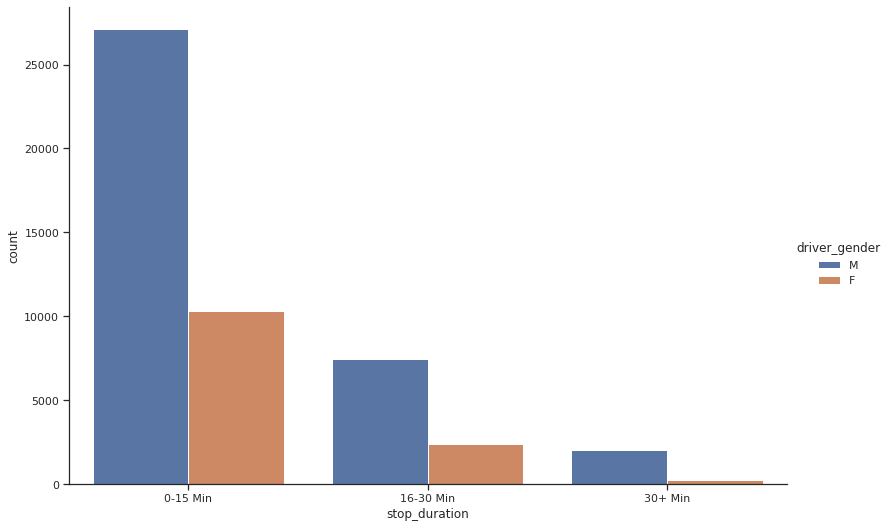

In [12]:
sns.catplot(x='stop_duration',kind='count' ,data=df, aspect = 1.5, height=7.5, hue = 'driver_gender')

<AxesSubplot:>

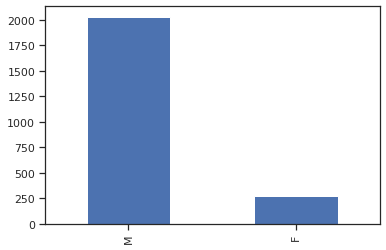

In [13]:
df.loc[df['stop_duration']=='30+ Min']['driver_gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

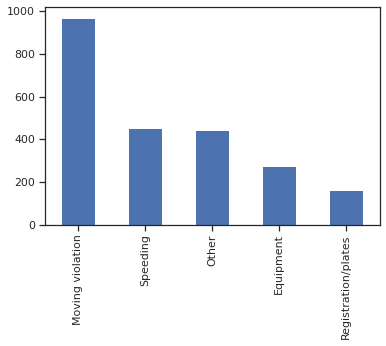

In [14]:
df.loc[df['stop_duration']=='30+ Min'].violation.value_counts().plot(kind='bar')

<AxesSubplot:>

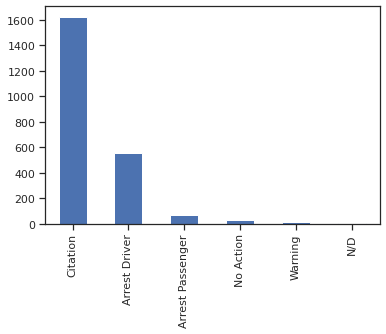

In [15]:
df.loc[df['stop_duration']=='30+ Min'].stop_outcome.value_counts().plot(kind='bar')

In [16]:
df.loc[df['stop_duration']=='30+ Min']['is_arrested'].value_counts()


False    1678
True      625
Name: is_arrested, dtype: int64

<AxesSubplot:ylabel='Frequency'>

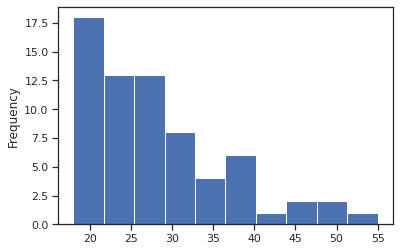

In [17]:
df.loc[(df['stop_duration']=='30+ Min') & (df['is_arrested']==True) & df['drugs_related_stop']==True]['driver_age'].plot(kind='hist')

In [18]:
df.dropna(subset = ['driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop'], inplace=True)

In [19]:
map1 = {
    False:0,
    True:1
    }
col_list = ['search_conducted','is_arrested','drugs_related_stop']

In [20]:
def change_columns_to_binary(df, col_list):
    for col in col_list:
        df[col] = df[col].map(map1)
    return df

In [21]:
change_columns_to_binary(df, col_list)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,0
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,0
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,0
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,0,Arrest Driver,1,16-30 Min,0
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52956,10/4/2011,22:22,M,1979.0,32.0,White,Speeding,Speeding,0,Arrest Driver,1,0-15 Min,0
52958,10/4/2011,22:36,F,1967.0,44.0,Hispanic,Speeding,Speeding,0,Citation,0,0-15 Min,0
52959,10/4/2011,23:25,F,1991.0,20.0,Black,Speeding,Speeding,0,Citation,0,0-15 Min,0
52962,10/5/2011,6:43,M,1986.0,25.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,0


In [22]:
df['stop_duration'].value_counts()

0-15 Min     37266
16-30 Min     9775
30+ Min       2299
Name: stop_duration, dtype: int64

In [23]:
map2 ={
    '0-15 Min':0,
    '16-30 Min':1,
    '30+ Min':2
}
df['stop_duration'] = df['stop_duration'].map(map2)

In [24]:
df = df.drop('driver_age_raw', axis = 1)

In [25]:
df['stop_date_time'] = df['stop_date']+' '+df['stop_time']
df

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_date_time
0,1/2/2005,1:55,M,20.0,White,Speeding,Speeding,0,Citation,0,0,0,1/2/2005 1:55
1,1/18/2005,8:15,M,40.0,White,Speeding,Speeding,0,Citation,0,0,0,1/18/2005 8:15
2,1/23/2005,23:15,M,33.0,White,Speeding,Speeding,0,Citation,0,0,0,1/23/2005 23:15
3,2/20/2005,17:15,M,19.0,White,Call for Service,Other,0,Arrest Driver,1,1,0,2/20/2005 17:15
4,3/14/2005,10:00,F,21.0,White,Speeding,Speeding,0,Citation,0,0,0,3/14/2005 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52956,10/4/2011,22:22,M,32.0,White,Speeding,Speeding,0,Arrest Driver,1,0,0,10/4/2011 22:22
52958,10/4/2011,22:36,F,44.0,Hispanic,Speeding,Speeding,0,Citation,0,0,0,10/4/2011 22:36
52959,10/4/2011,23:25,F,20.0,Black,Speeding,Speeding,0,Citation,0,0,0,10/4/2011 23:25
52962,10/5/2011,6:43,M,25.0,White,Speeding,Speeding,0,Citation,0,0,0,10/5/2011 6:43


In [26]:
df['stop_date_time'] = pd.to_datetime(df['stop_date_time'])
df = df.set_index('stop_date_time')


In [27]:
df = df.drop(['stop_date'  , 'stop_time'], axis = 1)
df

,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
stop_date_time,,,,,,,,,,
2005-01-02 01:55:00,M,20.0,White,Speeding,Speeding,0,Citation,0,0,0
2005-01-18 08:15:00,M,40.0,White,Speeding,Speeding,0,Citation,0,0,0
2005-01-23 23:15:00,M,33.0,White,Speeding,Speeding,0,Citation,0,0,0
2005-02-20 17:15:00,M,19.0,White,Call for Service,Other,0,Arrest Driver,1,1,0
2005-03-14 10:00:00,F,21.0,White,Speeding,Speeding,0,Citation,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2011-10-04 22:22:00,M,32.0,White,Speeding,Speeding,0,Arrest Driver,1,0,0
2011-10-04 22:36:00,F,44.0,Hispanic,Speeding,Speeding,0,Citation,0,0,0
2011-10-04 23:25:00,F,20.0,Black,Speeding,Speeding,0,Citation,0,0,0
